# Práctica 2: Procesamiento del Lenguaje Natural

__Fecha de entrega: 8 de mayo de 2023__

El objetivo de esta práctica es aplicar los conceptos teóricos vistos en clase en el módulo de PLN. La práctica consta de 2 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

In [21]:
RANDOM_STATE = 1234

# Apartado 1: Análisis de sentimientos con word embeddings


__Número de grupo: 31__

__Nombres de los estudiantes: Alejandro Tobías Ángeles y Miguel Antonio Amato Hermo__

## 1) Carga del conjunto de datos

El fichero `IMBD_Dataset.csv` contiene opiniones de películas clasificadas en 2 categorías diferentes (positiva/negativa).

Este set de datos se creó utilizando el "IMDB Dataset of 50K Movie Reviews", el cual contiene 50,000 reseñas de películas con un sentimiento positivo o negativo adjunto a ellas.

Muestra un ejemplo de cada clase.

Haz un estudio del conjunto de datos. ¿qué palabras aparecen más veces?, ¿tendría sentido normalizar de alguna manera el corpus?

Crea una partición de los datos dejando el 80% para entrenamiento y el 20% restante para test usando la función `train_test_split` de sklearn.


In [22]:
# acceso a google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import pandas as pd
import numpy as np


In [24]:
%load_ext google.colab.data_table


imbd_file = '/content/drive/MyDrive/IA2/p3/IMDB_Dataset.csv'

df=pd.read_csv(imbd_file)
df.head()

The google.colab.data_table extension is already loaded. To reload it, use:
  %reload_ext google.colab.data_table


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


# 1.1) Ejemplos de cada clase:

**Positiva**

In [25]:
%reload_ext google.colab.data_table

posdf = df[(df.sentiment == "positive")]
posdf.head()


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive


**Negativa**

In [26]:
%reload_ext google.colab.data_table

negdf = df[(df.sentiment == "negative")]
negdf.head()

,review,sentiment
3,Basically there's a family where a little boy ...,negative
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
10,Phil the Alien is one of those quirky films wh...,negative
11,I saw this movie when I was about 12 when it c...,negative


## 1.2) Palabras más frecuentes y Normalización

Leyendo las reviews puede verse que hay muchos caracteres especiales que se repiten pero no nos interesan, por eso antes de sacar las palabras que aparecen más veces, vamos a normalizar el texto para eliminarlos.

In [27]:
import nltk
import re

In [28]:
wpt = nltk.WordPunctTokenizer()
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    # lower case and remove special characters\whitespaces
    doc = re.sub(r"<br\s?\/?>", "", doc, re.I|re.A)
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    # tokenize document
    tokens = wpt.tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
#normalize_df = df
  
#for row in normalize_df.axes[0]:
 # normalize_df.iloc[row].review = normalize_document(normalize_df.iloc[row].review)

#Tambien hemos eliminado el caracter especial <br />
#normalize_df.head()

#corpus = np.array(df[['review', 'sentiment']])
#normalize_cor = normalize_corpus(corpus)
#normalize_cor

In [30]:
df['review'] = normalize_corpus(df['review'])

In [31]:
df.head()

,review,sentiment
0,one reviewers mentioned watching oz episode yo...,positive
1,wonderful little production filming technique ...,positive
2,thought wonderful way spend time hot summer we...,positive
3,basically theres family little boy jake thinks...,negative
4,petter matteis love time money visually stunni...,positive


Ahora tenemos las reviews de nuestro dataframe filtradas y normalizadas, poniendo todos los caracteres en minúsucula y eliminando todos los caracteres especiales que no aportan nada

Vamos a extraer las palabras más comunes de las reviews del dataframe

In [32]:
from collections import Counter

In [33]:
posndf = df[(df.sentiment == "positive")] # hacemos un dataframe solo con las reviews positivas

#print(posndf)
#posndf.head()
Counter(" ".join(posndf["review"]).split()).most_common(100)

[('film', 39439),
 ('movie', 36047),
 ('one', 25740),
 ('like', 17058),
 ('good', 14353),
 ('great', 12647),
 ('story', 12381),
 ('see', 11869),
 ('time', 11788),
 ('well', 10980),
 ('really', 10676),
 ('also', 10554),
 ('would', 10369),
 ('even', 9366),
 ('much', 8999),
 ('first', 8864),
 ('films', 8455),
 ('love', 8401),
 ('people', 8367),
 ('best', 8302),
 ('get', 8186),
 ('way', 7563),
 ('many', 7511),
 ('life', 7378),
 ('characters', 7177),
 ('think', 7129),
 ('movies', 7089),
 ('made', 7019),
 ('two', 6879),
 ('seen', 6627),
 ('dont', 6593),
 ('watch', 6469),
 ('character', 6453),
 ('show', 6411),
 ('little', 6398),
 ('make', 6299),
 ('still', 6278),
 ('never', 6269),
 ('could', 6110),
 ('man', 5904),
 ('know', 5661),
 ('years', 5319),
 ('ever', 5261),
 ('end', 5075),
 ('scene', 4963),
 ('real', 4867),
 ('say', 4799),
 ('back', 4740),
 ('scenes', 4733),
 ('makes', 4689),
 ('acting', 4619),
 ('new', 4585),
 ('better', 4557),
 ('go', 4548),
 ('us', 4537),
 ('plot', 4520),
 ('find',

Puede verse que entre las 100 palabras más comunes en las reviews positivas del dataframe figuran palabras con una connotación positiva como: best,better, well,good,great,etc .También figuran palabras que no tienen significado ni positivo ni negativo pero tienen que ver con el tema del que estamos hablando: movie, film,cast,actor,etc.

In [34]:
negndf = df[(df.sentiment == "negative")] # hacemos un dataframe solo con las reviews negativas

Counter(" ".join(negndf["review"]).split()).most_common(100)

[('movie', 47536),
 ('film', 35082),
 ('one', 24653),
 ('like', 21778),
 ('even', 14920),
 ('good', 14151),
 ('bad', 14095),
 ('would', 13633),
 ('really', 12224),
 ('time', 11514),
 ('see', 10568),
 ('dont', 10035),
 ('get', 9998),
 ('much', 9898),
 ('story', 9682),
 ('people', 9122),
 ('could', 9034),
 ('make', 8987),
 ('made', 8397),
 ('movies', 8358),
 ('first', 7975),
 ('plot', 7795),
 ('acting', 7788),
 ('well', 7484),
 ('characters', 7480),
 ('way', 7455),
 ('think', 7061),
 ('watch', 6973),
 ('also', 6938),
 ('films', 6836),
 ('know', 6613),
 ('never', 6564),
 ('better', 6489),
 ('seen', 6470),
 ('character', 6463),
 ('ever', 6369),
 ('two', 6049),
 ('little', 5914),
 ('say', 5820),
 ('many', 5752),
 ('nothing', 5725),
 ('something', 5645),
 ('thing', 5623),
 ('show', 5619),
 ('scene', 5574),
 ('end', 5444),
 ('scenes', 5439),
 ('didnt', 5431),
 ('im', 5402),
 ('watching', 5227),
 ('doesnt', 5149),
 ('great', 5076),
 ('go', 5029),
 ('actually', 5017),
 ('actors', 4880),
 ('wors

Sin embargo para las reviews negativas se observa que aparecen palabras con un significado más negativo como bad o worst. Por otro lado se aprecia que hay una cantidad muy parecida de palabras condicionales (would) con palabras positivas (good), esto puede deberse a que en la review se utilizan frases como "This film would be good if..." que a pesar de la aparición de good, implican un significado negativo.

# 1.3) Separación en grupos de train y test

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'].map({'positive': 1, 'negative': 0}), test_size=0.2, random_state=RANDOM_STATE, stratify = df.sentiment)

In [45]:
print('Proporciones Train')
print(y_train.value_counts())

print('Proporciones Test')
print(y_test.value_counts())


Proporciones Train
0    20000
1    20000
Name: sentiment, dtype: int64
Proporciones Test
0    5000
1    5000
Name: sentiment, dtype: int64


Hemos comprobado que la proporción entre train y test sí es del 80% y 20% y que además tienen una distribución adecuada de las clases

## 2) Estudio del efecto de distintas configuraciones de word embeddings para resolver la tara

Usa distintas configuraciones de word embeddigns y discute los resultados obtenidos.



In [46]:
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences

max_words = 1500
max_comment_length = 20

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.review)

sequences = tokenizer.texts_to_sequences(df.review)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
max_words = len(word_index)

data = pad_sequences(sequences, maxlen=max_comment_length)

Found 214441 unique tokens.


In [53]:
X_train, X_test, y_train, y_test = train_test_split(data, df['sentiment'].map({'positive': 1, 'negative': 0}), test_size=0.2, random_state=RANDOM_STATE, stratify = df.sentiment)

In [47]:
# Fijamos el tamaño de los embedding a 50 dimensiones

embedding_dim = 50

In [54]:
# MODELO 1. SIN EMBEDDINGS PRE-ENTRENADOS 

from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model1 = Sequential()
# We specify the maximum input length to our Embedding layer
# so we can later flatten the embedded inputs


model1.add(Embedding(max_words, embedding_dim, input_length=max_comment_length))
# After the Embedding layer, our activations have shape `(max_words, max_comment_length, embedding_dim)`.

# We flatten the 3D tensor of embeddings into a 2D tensor of shape `(max_words, max_comment_length * embedding_dim)`

model1.add(Flatten())

# We add the classifier on top
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

history = model1.fit(X_train, y_train,epochs=10,batch_size=32,validation_data=(X_test, y_test))

score1 = model1.evaluate(X_test, y_test)

print("Accuracy: %.2f%%" % (score1[1]*100))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 20, 50)            10722050  
                                                                 
 flatten_7 (Flatten)         (None, 1000)              0         
                                                                 
 dense_7 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 10,723,051
Trainable params: 10,723,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==============================] - 310s 248ms/step - loss: 0.4873 - accuracy: 0.7674 - val_loss: 0.4295 - val_accuracy: 0.7984
Epoch 2/10
1250/1250 [==============================] - 321s 257ms/step - loss: 0.3969 - accuracy: 0.8176 - val_loss: 0.4310 - val_accuracy: 0.7988
Epoch 3/10

In [55]:
import os
import numpy as np

glove_dir = '/content/drive/MyDrive/IA2/p3/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.50d.txt'))
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [56]:
embedding_dim = 50

embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            # Words not found in embedding index will be all-zeros.
            embedding_matrix[i] = embedding_vector

In [57]:
# MODELO 2. EMBEDDINGS PRE-ENTRENADOS CONGELADOS

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length=max_comment_length))
model2.add(Flatten())
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 20, 50)            10722050  
                                                                 
 flatten_8 (Flatten)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 10,723,051
Trainable params: 10,723,051
Non-trainable params: 0
_________________________________________________________________


In [58]:
model2.layers[0].set_weights([embedding_matrix])
model2.layers[0].trainable = False

In [59]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model2.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_data=(X_test, y_test))

score2 = model2.evaluate(X_test, y_test)

Epoch 1/20
1250/1250 [==============================] - 7s 4ms/step - loss: 0.6094 - accuracy: 0.6676 - val_loss: 0.5725 - val_accuracy: 0.6963
Epoch 2/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5712 - accuracy: 0.7019 - val_loss: 0.5702 - val_accuracy: 0.6978
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5669 - accuracy: 0.7070 - val_loss: 0.5689 - val_accuracy: 0.7011
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5662 - accuracy: 0.7070 - val_loss: 0.5720 - val_accuracy: 0.6999
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 0.5646 - accuracy: 0.7107 - val_loss: 0.5725 - val_accuracy: 0.6982
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5657 - accuracy: 0.7096 - val_loss: 0.5769 - val_accuracy: 0.6945
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5642 - accuracy: 0.7099 - val_loss: 0.5726 - val_accuracy:

In [60]:
# MODELO3. EMBEDDINGS PREENTRENADOS SIN CONGELAR

from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model3 = Sequential()
model3.add(Embedding(max_words, embedding_dim, input_length=max_comment_length))
model3.add(Flatten())
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

model3.layers[0].set_weights([embedding_matrix])
model3.layers[0].trainable = True

model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model3.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_test, y_test))

score3 = model3.evaluate(X_test, y_test)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 20, 50)            10722050  
                                                                 
 flatten_9 (Flatten)         (None, 1000)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 10,723,051
Trainable params: 10,723,051
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1250/1250 [==============================] - 313s 250ms/step - loss: 0.5522 - accuracy: 0.7113 - val_loss: 0.4620 - val_accuracy: 0.7835
Epoch 2/10
1250/1250 [==============================] - 330s 264ms/step - loss: 0.4298 - accuracy: 0.7990 - val_loss: 0.4403 - val_accuracy: 0.7957
Epoch 3/10

# Resumen de los resultados

In [61]:
print("Sin word embeddings pre-entrenados")
print("Accuracy: %.2f%%" % (score1[1]*100))
print("Con word embeddings pre-entrenados congelados")
print("Accuracy: %.2f%%" % (score2[1]*100))
print("Con word embeddings pre-entrenados sin congelar")
print("Accuracy: %.2f%%" % (score3[1]*100))

Sin word embeddings pre-entrenados
Accuracy: 74.09%
Con word embeddings pre-entrenados congelados
Accuracy: 69.78%
Con word embeddings pre-entrenados sin congelar
Accuracy: 76.03%


El modelo que utiliza word embeddings pre-entrenados sin congelar ha obtenido la mayor precisión entre los tres modelos.

En general, los resultados sugieren que el uso de word embeddings pre-entrenados puede ser beneficioso para mejorar el rendimiento de los modelos en la clasificación de lenguajes. Sin embargo, el rendimiento puede variar dependiendo de si los word embeddings pre-entrenados se congelan o no. En este caso, ajustar finamente los word embeddings pre-entrenados ha dado como resultado una precisión más alta que utilizar word embeddings sin pre-entrenamiento o congelados.


## 3) Análisis final

Analiza con detalle el mejor clasificador. Busca un ejemplo mal clasificado de cada clase, justifica el error ¿se te ocurre alguna forma de solucionarlo?

Compara los resultados obtenidos con y sin word embeddings


In [64]:
y_pred = model3.predict(X_test)
y_pred_binary = (y_pred >= 0.5).astype(int)


313/313 [==============================] - 1s 2ms/step


(array([0.5, 1.5]), [Text(0.5, 0, '0'), Text(1.5, 0, '1')])

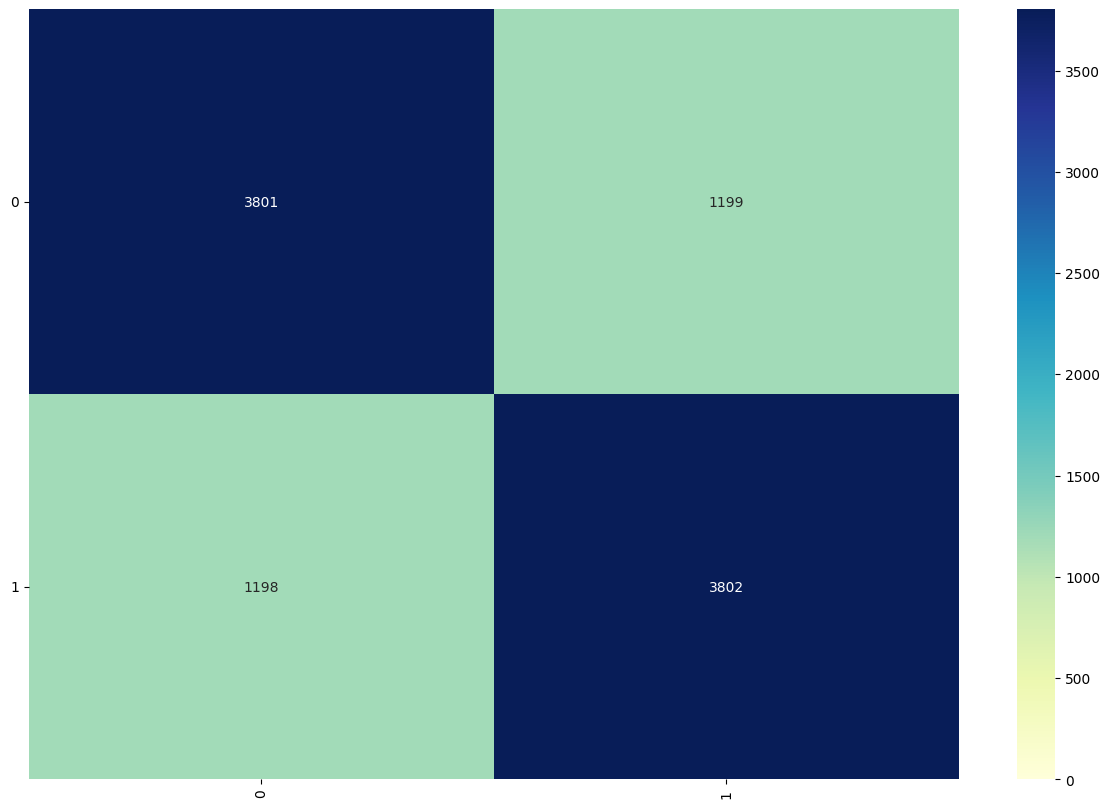

In [66]:
%matplotlib inline
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_binary)
conf_matrix_df = pd.DataFrame(cm, index=y_test.unique(), columns=y_test.unique())

plt.figure(figsize=(15, 10))
sn.heatmap(conf_matrix_df, annot=True, vmin=0, vmax=cm.max(), fmt='d', cmap="YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)

In [71]:
from sklearn.metrics import classification_report

# Obtener las predicciones del modelo
y_pred_binary = (y_pred >= 0.5).astype(int)

# Generar el reporte de clasificación
report = classification_report(y_test, y_pred_binary)

# Imprimir el reporte
print(report)

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      5000
           1       0.76      0.76      0.76      5000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



El valor-F obtenido es del 76.03% para el modelo con embeddings pre-entrenados sin congelar. Esto indica un equilibrio entre la capacidad del modelo para predecir correctamente el sentiment de cada review.

En resumen, el modelo con embeddings pre-entrenados sin congelar ha logrado un rendimiento equilibrado en la clasificación de las muestras positivas, con una alta precisión, recall y valor-F del 76%. Esto sugiere que el modelo es capaz de clasificar correctamente la mayoría de las muestras y tiene una buena capacidad para detectarlas.

In [78]:
for i in range(len(y_test)):
    if y_test[i] != y_pred_binary[i]:
        misclassified_sample = (X_test[i], y_test[i], y_pred_binary[i])
        break

# Imprimir algunos ejemplos mal clasificados

print("Texto:", misclassified_sample[0])
print("Etiqueta real:", misclassified_sample[1])
print("Etiqueta predicha:", misclassified_sample[2])
print("----------")


Texto: [1048  126   25  258   27  271  586  175   55    2   40   26   44  122
  244  624  252 1057  718  777]
Etiqueta real: 1
Etiqueta predicha: [0]
----------


In [91]:
# Obtener el mapeo inverso de índices a palabras
inv_vocab = {v: k for k, v in tokenizer.word_index.items()}

# Convertir las secuencias numéricas a texto
texto_invertido = []
palabras = [inv_vocab[indice] for indice in misclassified_sample[0] if indice in inv_vocab]
texto_invertido.append(" ".join(palabras))

# Imprimir algunos ejemplos de texto invertido
for i in range(len(texto_invertido)):
    print('Reseña invertida:', texto_invertido[i])

Reseña invertida: accent far could tell characters awful havent watched real film know way better point classic comic line garbage avoid unless


Parece ser que en este ejemplo, que ha clasificado equivocadamente como review negativa, se ha equivocado por la cantidad de palabras con connotación negativa que hay, quizás el problema es que se han eliminado demasiadas palabras de esta review y no le queda nada con lo que entender el contexto de la misma.